<a href="https://colab.research.google.com/github/HernanAC/TaiwaneseBankruptcyPrediction/blob/main/05%20-%20Modelos%20con%20SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05 - Modelos con SMOTE**

##Preparación del entorno

In [ ]:
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.2 MB/s eta 0:00:00


In [ ]:
import os
import re
import sklearn
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from scipy.stats import norm
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
url = 'https://raw.githubusercontent.com/HernanAC/TaiwaneseBankruptcyPrediction/main/processed_data.csv'
data = pd.read_csv(url)

In [ ]:
X = data.drop(['Bankrupt?'],axis=1)
y = data['Bankrupt?']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

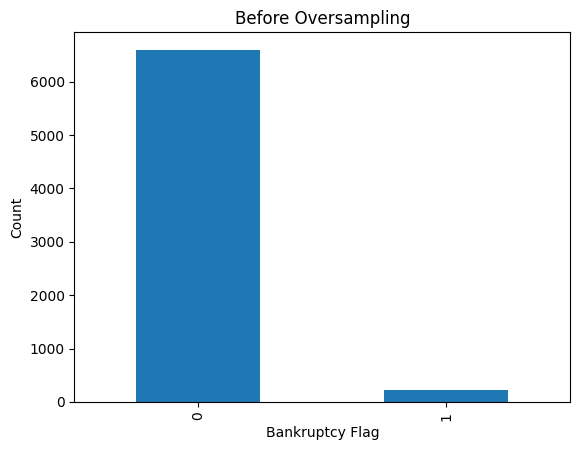

In [ ]:
data['Bankrupt?'].value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

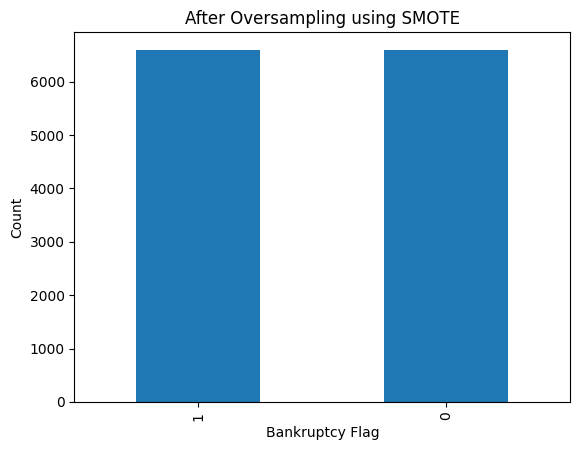

In [ ]:
y_res.value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.30, random_state=42,stratify=y_res)

In [ ]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [ ]:
import re
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in data.columns]
data.head()

,bankrupt?,_operating _gross _margin,_realized _sales _gross _margin,_operating _profit _rate,_pre-tax net _interest _rate,_after-tax net _interest _rate,_continuous interest rate (after tax),_operating _expense _rate,_research and development expense rate,_cash flow rate,...,is__i_t_r__m_e_d_i_u_m,is__w_c_e__h_i_g_h,is__w_c_e__l_o_w,is__w_c_e__m_e_d_i_u_m,is__c_f_s__h_i_g_h,is__c_f_s__l_o_w,is__c_f_s__m_e_d_i_u_m,is__n_i_t_a__h_i_g_h,is__n_i_t_a__l_o_w,is__n_i_t_a__m_e_d_i_u_m
0,1,0.608066,0.601457,0.998969,0.796887,0.808809,0.780985,1.256969e-04,0.0,0.458143,...,0,1,0,0,1,0,0,1,0,0
1,1,0.610235,0.610235,0.998946,0.797380,0.809301,0.781506,2.897851e-04,0.0,0.461867,...,0,1,0,0,1,0,0,1,0,0
2,1,0.601450,0.601364,0.998857,0.796403,0.808388,0.780284,2.361297e-04,25500000.0,0.458521,...,0,1,0,0,1,0,0,1,0,0
3,1,0.583541,0.583541,0.998700,0.796967,0.808966,0.781241,1.078888e-04,0.0,0.465705,...,0,1,0,0,1,0,0,1,0,0
4,1,0.598783,0.598783,0.998973,0.797366,0.809304,0.781550,7.890000e+09,0.0,0.462746,...,0,1,0,0,1,0,0,1,0,0


###Validación cruzada de k iteraciones o k-fold cross validation

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=False)

for index_train, index_test in skf.split(X_train, y_train):
    X_train_sm, X_val_sm = X_train.iloc[index_train], X_train.iloc[index_test]
    y_train_sm, y_val_sm = y_train.iloc[index_train], y_train.iloc[index_test]

X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

###Regresión Logística

In [ ]:
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
log_reg_params = {
    "penalty": ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])

    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))

mean_accuracy = np.mean(accuracy_lst_reg)
mean_precision = np.mean(precision_lst_reg)
mean_recall = np.mean(recall_lst_reg)
mean_f1 = np.mean(f1_lst_reg)

print('Regresión Logística con SMOTE resultados:')
print('')
print("accuracy: {}".format(mean_accuracy))
print("precision: {}".format(mean_precision))
print("recall: {}".format(mean_recall))
print("f1: {}".format(mean_f1))

Regresión Logística con SMOTE resultados:

accuracy: 0.6010018472416263
precision: 0.6444245335830787
recall: 0.4500676589986468
f1: 0.5299457109401133


In [ ]:
rand_log_reg.best_params_

{'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 10}

In [ ]:
label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.57      0.75      0.65       923
Fin.Unstable       0.64      0.44      0.52       924

    accuracy                           0.60      1847
   macro avg       0.61      0.60      0.59      1847
weighted avg       0.61      0.60      0.59      1847



###Potenciación del gradiente

In [ ]:
accuracy_lst_gbc = []
precision_lst_gbc = []
recall_lst_gbc = []
f1_lst_gbc = []
auc_lst_gbc = []

gbc_sm = GradientBoostingClassifier()
gbc_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'n_estimators': [20, 50, 100, 200, 300]
}

rand_gbc = RandomizedSearchCV(gbc_sm, gbc_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_gbc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_gbc)
    model_gbc = pipeline_gbc.fit(X_train_sm, y_train_sm)
    best_est_gbc = rand_gbc.best_estimator_
    prediction_gbc = best_est_gbc.predict(X_train_sm[val])

    accuracy_lst_gbc.append(pipeline_gbc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_gbc.append(precision_score(y_train_sm[val], prediction_gbc))
    recall_lst_gbc.append(recall_score(y_train_sm[val], prediction_gbc))
    f1_lst_gbc.append(f1_score(y_train_sm[val], prediction_gbc))
    auc_lst_gbc.append(roc_auc_score(y_train_sm[val], prediction_gbc))

mean_accuracy_gbc = np.mean(accuracy_lst_gbc)
mean_precision_gbc = np.mean(precision_lst_gbc)
mean_recall_gbc = np.mean(recall_lst_gbc)
mean_f1_gbc = np.mean(f1_lst_gbc)

print("accuracy: {}".format(mean_accuracy_gbc))
print("precision: {}".format(mean_precision_gbc))
print("recall: {}".format(mean_recall_gbc))
print("f1: {}".format(mean_f1_gbc))

In [ ]:
rand_gbc.best_params_

In [ ]:
smote_prediction_gbc = best_est_gbc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_gbc, target_names=label))

###Potenciación extrema del gradiente

In [ ]:
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgboost.XGBClassifier(random_state=42)
xgb_params = {
    'eta': [0.1, 0.01, 0.001],
    'eval_metric': ['logloss'],
    'max_depth': [3, 6, 9],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.5, 1]
}

rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb)
    model_xgb = pipeline_xgb.fit(X_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train_sm[val])

    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))

mean_accuracy_xgb = np.mean(accuracy_lst_xgb)
mean_precision_xgb = np.mean(precision_lst_xgb)
mean_recall_xgb = np.mean(recall_lst_xgb)
mean_f1_xgb = np.mean(f1_lst_xgb)

print('---' * 45)
print('Extreme Gradient Boosting (con SMOTE) resultados:')
print('')
print("accuracy: {}".format(mean_accuracy_xgb))
print("precision: {}".format(mean_precision_xgb))
print("recall: {}".format(mean_recall_xgb))
print("f1: {}".format(mean_f1_xgb))
print('---' * 45)

In [ ]:
rand_xgb.best_params_

In [ ]:
smote_prediction_xgb = best_est_xgb.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_xgb, target_names=label))

###Bosques Aleatorios

In [ ]:
accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
rfc_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'class_weight': ['balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rand_rfc = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc)
    model_rfc = pipeline_rfc.fit(X_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(X_train_sm[val])

    accuracy_lst_rfc.append(pipeline_rfc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))

mean_accuracy_rfc = np.mean(accuracy_lst_rfc)
mean_precision_rfc = np.mean(precision_lst_rfc)
mean_recall_rfc = np.mean(recall_lst_rfc)
mean_f1_rfc = np.mean(f1_lst_rfc)

print('Bosques Aleatorios con SMOTE resultados:')
print("accuracy: {}".format(mean_accuracy_rfc))
print("precision: {}".format(mean_precision_rfc))
print("recall: {}".format(mean_recall_rfc))
print("f1: {}".format(mean_f1_rfc))

In [ ]:
rand_rfc.best_params_

In [ ]:
label = ['Fin.Stable', 'Fin.Unstable']
smote_prediction_rfc = best_est_rfc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_rfc, target_names=label))

###Catboost

In [ ]:
precision_lst_cbt = []
recall_lst_cbt = []
f1_lst_cbt = []
auc_lst_cbt = []

cbt_sm = CatBoostClassifier(verbose=0)

cbt_params = {
    'eval_metric': ['F1'],
    'iterations': [100, 500, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'random_seed': [42],
    'auto_class_weights': ['Balanced', 'SqrtBalanced']
}

rand_cbt = RandomizedSearchCV(cbt_sm, cbt_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_cbt = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_cbt)
    model_cbt = pipeline_cbt.fit(X_train_sm, y_train_sm)
    best_est_cbt = rand_cbt.best_estimator_
    prediction_cbt = best_est_cbt.predict(X_train_sm[val])

    precision_lst_cbt.append(precision_score(y_train_sm[val], prediction_cbt))
    recall_lst_cbt.append(recall_score(y_train_sm[val], prediction_cbt))
    f1_lst_cbt.append(f1_score(y_train_sm[val], prediction_cbt))
    auc_lst_cbt.append(roc_auc_score(y_train_sm[val], prediction_cbt))

mean_precision_cbt = np.mean(precision_lst_cbt)
mean_recall_cbt = np.mean(recall_lst_cbt)
mean_f1_cbt = np.mean(f1_lst_cbt)

print("precision: {}".format(mean_precision_cbt))
print("recall: {}".format(mean_recall_cbt))
print("f1: {}".format(mean_f1_cbt))

In [ ]:
rand_cbt.best_params_

In [ ]:
smote_prediction_cbt = best_est_cbt.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_cbt, target_names=label))

##Comparación de la efectividad de los modelos

In [ ]:
from sklearn.metrics import roc_curve

rfc_false_positive_rate, rfc_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_rfc)
gbc_false_positive_rate, gbc_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_gbc)
xgb_false_positive_rate, xgb_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_xgb)
log_false_positive_rate, log_true_positive_rate, _ = roc_curve(y_val_sm, pred_reg_sm)
cat_false_positive_rate, cat_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_cbt)


def create_ROC(log_false_positive_rate, log_true_positive_rate, rfc_false_positive_rate, rfc_true_positive_rate, xgb_false_positive_rate, xgb_true_positive_rate, cat_false_positive_rate, cat_true_positive_rate, gbc_false_positive_rate, gbc_true_positive_rate):
    plt.figure(figsize=(20,8))
    plt.title('Curvas ROC', fontsize=14)
    plt.plot(log_false_positive_rate, log_true_positive_rate, label='AUC Regresión logística: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot(gbc_false_positive_rate, gbc_true_positive_rate, label='AUC Gradient Boosting: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_gbc)))
    plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, label='AUC XGBoost: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_xgb)))
    plt.plot(rfc_false_positive_rate, rfc_true_positive_rate, label='AUC Random Forest: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_rfc)))
    plt.plot(cat_false_positive_rate, cat_true_positive_rate, label='AUC CatBoost: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_cbt)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend()
    
create_ROC(log_false_positive_rate, log_true_positive_rate, rfc_false_positive_rate, rfc_true_positive_rate, xgb_false_positive_rate, xgb_true_positive_rate, cat_false_positive_rate, cat_true_positive_rate, gbc_false_positive_rate, gbc_true_positive_rate)

plt.show()